In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from geopy.geocoders import Nominatim
from geopy import distance
from geopy.distance import geodesic
import census
import pandas as pd
import geopandas as gpd
import censusdata
import censusgeocode as cg
import geopy
from geopy.geocoders import Nominatim
import numpy as np
import plotly_express as px
import matplotlib.pyplot as plt
import requests

In [1]:
!pip install census
!pip install censusdata
!pip install censusgeocode
!pip install geopy
!pip install geopandas
!pip install plotly_express

In [4]:
comp = pd.read_excel('TennesseecompDF.xlsx')
comp = comp.drop(columns=['Unnamed: 0','NumOfKohl'])
comp

,Tract,County,Store,TotalVists,TotalNumOfCompetitors,TotalCompetitorVisits
0,100200,63,Kohls,588026,1,588026
1,21002,165,Kohls,503988,1,503988
2,40908,149,Kohls,462298,1,462298
3,4404,93,Kohls,445887,1,445887
4,5813,93,Kohls,418345,1,418345
...,...,...,...,...,...,...
114,920500,55,The Home Depot,455324,1,455324
115,40601,167,The Home Depot,402551,1,402551
116,960402,51,The Home Depot,388492,1,388492
117,970600,31,The Home Depot,357006,1,357006


In [5]:
newDF = pd.DataFrame()
for a in range(0,len(comp)):
    county = comp.County[a]
    countyDF = comp[comp['County'] == county]
    countyDF.reset_index(inplace=True, drop=True)
    
    for b in range(0, len(countyDF)):
        tract = countyDF.Tract[b]
        tractDF = countyDF[countyDF['Tract'] == tract]
        tractDF.reset_index(inplace=True, drop=True)
       
       
        NumOfKohl = 0
        NumOfLowe = 0
      
        NumOfHomeDepot = 0
        
        VisitsOfKohl = 0
        VisitsOfLowe = 0
      
        VisitsOfHomeDepot = 0
        
        
        for i,j in tractDF.iterrows():
                
        
          
                
            if (j['Store'] == 'Kohls'):
                NumOfKohl = NumOfKohl + 1
                VisitsOfKohl = j['TotalVists']
                
            if (j['Store'] == 'Lowes'):
                NumOfLowe = NumOfLowe + 1
                VisitsOfLowe = j['TotalVists']
            
                
            if (j['Store'] == 'The Home Depot'):
                NumOfHomeDepot = NumOfHomeDepot + 1
                VisitsOfHomeDepot = j['TotalVists']
            
        
                
        data = {
                'Tract' : tract,
                'County'  : county,
                'TotalNumOfCompetitors' : tractDF.iloc[0]['TotalNumOfCompetitors'],
                'TotalCompetitorVisits' : tractDF.iloc[0]['TotalCompetitorVisits'],
               
                'NumOfKohl' : NumOfKohl,
                'NumOfLowe' : NumOfLowe,
               
                'NumOfHomeDepot' : NumOfHomeDepot,
                
                'VisitsOfKohl' : VisitsOfKohl,
                'VisitsOfLowe' : VisitsOfLowe,
              
                'VisitsOfHomeDepot' : VisitsOfHomeDepot
                
               }
        data = pd.DataFrame(data, index=[0])
        newDF = pd.concat([newDF, data])

newDF.reset_index(inplace=True, drop=True)
newDF.drop_duplicates(subset=None, keep="first", inplace=True)

In [6]:
census = pd.read_excel('Tennessee Census Data.xlsx')
census

,Tract,County,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,Age15PopulationNeverMarried,Age15PopulationMarried
0,19004,37,226,991,536,191,109,9,991,689,502,1380,1481
1,19007,37,212,430,478,167,71,9,430,441,419,684,715
2,19008,37,411,1461,554,162,143,86,1461,1015,811,1890,1879
3,19105,37,313,1231,940,415,161,112,1231,1152,823,1678,1931
4,19106,37,336,988,903,327,346,82,988,797,358,1602,1362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,80103,147,614,1990,504,778,225,188,1990,1033,1157,1100,3250
1697,80104,147,498,2436,465,515,449,218,2436,1040,1952,1112,4010
1698,80200,147,486,1630,453,237,498,71,1630,520,1330,1057,2950
1699,80301,147,118,680,245,146,105,11,680,318,414,601,1162


In [7]:
rent =  pd.read_excel('TennesseePropertyTractAverageRent.xlsx')

In [8]:
censusRent = census.merge(
    rent,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)
censusRent
censusRent = censusRent.drop(columns=['Unnamed: 0'])

In [9]:
home = pd.read_excel('homegoods-tennessee.xlsx')
home

,Rank,Name,TotalVisits,lat,lng
0,1,"HomeGoods / 2011 N Roan St, Johnson City, TN, ...",544090,36.338706,-82.377203
1,2,"HomeGoods / 8079 Kingston Pike, Knoxville, TN,...",501003,35.926319,-84.049404
2,3,"HomeGoods / 484 N Thompson Lane, Murfreesboro,...",357527,35.854733,-86.427536
3,4,"HomeGoods / 1026 Glenbrook Way, Hendersonville...",344169,36.334432,-86.622908
4,5,"HomeGoods / 377 W Jackson St, Cookeville, TN, ...",340950,36.157570,-85.519275
5,6,"HomeGoods / 750 Winfield Dunn Pkwy, Seviervill...",321679,35.883026,-83.575910
6,7,"HomeGoods / 1030 Crossings Boulevard, Spring H...",320892,35.739775,-86.939660
7,8,"HomeGoods / 2200 Hamilton Place Blvd, Chattano...",315205,35.035655,-85.154223
8,9,"HomeGoods / 1602 Chickering Lane, Memphis, Ten...",310435,35.169319,-89.794990
9,10,"HomeGoods / 8145 Sawyer Brown Rd, Nashville, T...",266647,36.081169,-86.945330


In [10]:
homeDF = pd.DataFrame()
j = 0
for i in  list(range(0,len(home))):
    print(i)
    try:
        CensusGeoData1 = cg.coordinates(x=home.lng[i], y= home.lat[i])
        
    except:
        pass
    
    else:
        homeDF.loc[j, 'Tract']  = CensusGeoData1 ['Census Tracts'][0]['TRACT']
        homeDF.loc[j,'County'] = CensusGeoData1 ['Census Tracts'][0]['COUNTY']
        homeDF.loc[j,'TotalVisits'] = home.TotalVisits[i]
        j = j + 1
    
homeDF.head()        

0
1
2
3
4
5
6
7
8
9
10
11
12
13


,Tract,County,TotalVisits
0,060401,179,544090.0
1,004403,093,501003.0
2,040901,149,357527.0
3,021002,165,344169.0
4,000700,141,340950.0


In [11]:
homeDF['Tract'] = homeDF['Tract'].astype(int)
homeDF['County'] = homeDF['County'].astype(int)

In [12]:
censusRentStore = homeDF.merge(
    censusRent,
    "inner",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)
censusRentStore['AvgRent'] = censusRentStore['AvgRent'] .fillna(0)
censusRentStore

,Tract,County,TotalVisits,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,Age15PopulationNeverMarried,Age15PopulationMarried,AvgRent
0,60401,179,544090.0,50,532,363,168,106,4,532,143,868,365,924,0.000000
1,4403,93,501003.0,356,1185,1351,228,220,323,1185,613,1066,1431,1868,1007.800000
2,40901,149,357527.0,258,1086,851,283,146,114,1086,720,738,1014,1995,1550.200000
3,21002,165,344169.0,576,2045,486,475,485,246,2045,1120,1674,1388,3339,1552.000000
4,700,141,340950.0,104,734,986,98,124,0,734,410,727,1225,1092,0.000000
5,80601,155,321679.0,174,1106,788,204,142,50,1106,643,1298,1096,1925,0.000000
6,10203,119,320892.0,258,999,347,228,373,123,999,374,921,558,1698,0.000000
7,11446,65,315205.0,274,1361,684,310,323,88,1361,538,1081,1315,2043,1197.333333
8,21126,157,310435.0,190,1190,847,387,283,33,1190,861,944,1188,1959,1279.500000
9,18412,37,266647.0,282,875,1105,333,318,283,875,613,912,1394,1518,1611.000000


In [13]:
trainData = censusRentStore.merge(
    newDF,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

trainData = trainData.fillna(0)
trainData = trainData.drop(columns=['Tract','County'])
trainData

,TotalVisits,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,...,Age15PopulationMarried,AvgRent,TotalNumOfCompetitors,TotalCompetitorVisits,NumOfKohl,NumOfLowe,NumOfHomeDepot,VisitsOfKohl,VisitsOfLowe,VisitsOfHomeDepot
0,544090.0,50,532,363,168,106,4,532,143,868,...,924,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,501003.0,356,1185,1351,228,220,323,1185,613,1066,...,1868,1007.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,357527.0,258,1086,851,283,146,114,1086,720,738,...,1995,1550.200000,1.0,1089643.0,0.0,0.0,1.0,0.0,0.0,1089643.0
3,344169.0,576,2045,486,475,485,246,2045,1120,1674,...,3339,1552.000000,1.0,503988.0,1.0,0.0,0.0,503988.0,0.0,0.0
4,340950.0,104,734,986,98,124,0,734,410,727,...,1092,0.000000,1.0,323738.0,1.0,0.0,0.0,323738.0,0.0,0.0
5,321679.0,174,1106,788,204,142,50,1106,643,1298,...,1925,0.000000,2.0,1351813.0,0.0,1.0,1.0,0.0,757014.0,594799.0
6,320892.0,258,999,347,228,373,123,999,374,921,...,1698,0.000000,1.0,305453.0,1.0,0.0,0.0,305453.0,0.0,0.0
7,315205.0,274,1361,684,310,323,88,1361,538,1081,...,2043,1197.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,310435.0,190,1190,847,387,283,33,1190,861,944,...,1959,1279.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,266647.0,282,875,1105,333,318,283,875,613,912,...,1518,1611.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
cols = ['TotalFemale40to49','NumOfKohl','NumOfLowe',
       'FamilyHouseholds','NonFamilyHouseholds','TotalNumOfCompetitors', 
       'NumOfHomeDepot','VisitsOfLowe', 'VisitsOfKohl',
       'NumberOfHouseholdIncomeLessThan100000',
       'NumberOfHouseholdIncomeLessThan150000',
       'NumberOfHouseholdIncomeLessThan200000',
        'NumofEarnersInFamily',
        'Population30to39',  'TotalCompetitorVisits',
        'PopulationAbove60',
       'VisitsOfHomeDepot']

cols_str = " + ".join(cols)
mod = smf.ols(formula=f"TotalVisits ~ {cols_str}", data=trainData)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:            TotalVisits   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                nan
Time:                        02:23:42   Log-Likelihood:                 119.49
No. Observations:                  14   AIC:                            -211.0
Df Residuals:                       0   BIC:                            -202.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/Users/param/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/param/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/param/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/param/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [15]:
#Test data 
censusTest = pd.read_excel('Tennessee Census Data.xlsx')

censusTestRent = censusTest.merge(
    rent,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

censusTestRent = censusTestRent.drop(columns=['Unnamed: 0'])

testData = censusTestRent.merge(
    newDF,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

testData = testData.fillna(0)
censusRentStoreCopy = censusRentStore
testData = testData[~testData.County.isin(censusRentStoreCopy['County'])]
tractCountyDF = testData[['Tract','County']]
testData = testData.drop(columns=['Tract','County'])
data = testData
testData

,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,Age15PopulationNeverMarried,Age15PopulationMarried,AvgRent,TotalNumOfCompetitors,TotalCompetitorVisits,NumOfKohl,NumOfLowe,NumOfHomeDepot,VisitsOfKohl,VisitsOfLowe,VisitsOfHomeDepot
27,130,476,241,65,62,41,476,110,546,254,927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,98,591,296,93,18,36,591,243,542,564,925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,75,541,427,54,37,5,541,193,915,366,992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,146,510,199,63,103,21,510,149,601,375,794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,228,1078,278,148,160,18,1078,461,1171,550,1882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,614,1990,504,778,225,188,1990,1033,1157,1100,3250,1324.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,498,2436,465,515,449,218,2436,1040,1952,1112,4010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1698,486,1630,453,237,498,71,1630,520,1330,1057,2950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1699,118,680,245,146,105,11,680,318,414,601,1162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [17]:
X, y = trainData.iloc[:,1:],trainData.iloc[:,0]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Training score:  0.9999999999995175


/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is 

RMSE: 13422.88


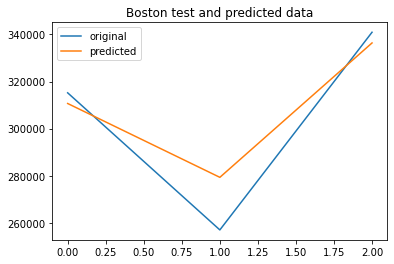

[310673.34 279293.   336401.75]


In [19]:
from sklearn.model_selection import cross_val_score, KFold
xgbr = xgb.XGBRegressor(verbosity=0) 

xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)
scores = cross_val_score(xgbr, X_train, y_train,cv=10)

ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("RMSE: %.2f" % (mse**(1/2.0)))

preds = xgbr.predict(testData)

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.legend()
plt.show()

print(ypred)

In [20]:
predDF = pd.DataFrame(preds)
predDF.columns = ['Score']
predDF.reset_index(inplace=True, drop=True)
data.reset_index(inplace=True, drop=True)
tractCountyDF.reset_index(inplace=True, drop=True)

In [21]:
for i in list(range(0,len(data))):
    data.loc[i,'Prediction'] =  predDF.loc[i,'Score']
    data.loc[i, 'Tract'] = tractCountyDF.loc[i,'Tract']
    data.loc[i, 'County'] = tractCountyDF.loc[i,'County']
    
    

In [22]:
data.to_excel('Tennessee HomeGoods Prediction.xlsx')